It is often the case in programming – especially when dealing with randomness – that we want to repeat a process multiple times. For example, recall the game of betting on one roll of a die with the following rules:

If the die shows 1 or 2 spots, my net gain is -1 dollar.
If the die shows 3 or 4 spots, my net gain is 0 dollars.
If the die shows 5 or 6 spots, my net gain is 1 dollar.
The function bet_on_one_roll takes no argument. Each time it is called, it simulates one roll of a fair die and returns the net gain in dollars.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def bet_on_one_roll():
    """Returns my net gain on one bet"""
    x = np.random.choice(np.arange(1, 7))  # roll a die once and record the number of spots
    if x <= 2:
        return -1
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1

Playing this game once is easy:

In [3]:
bet_on_one_roll()

-1

A more automated solution is to use a for statement to loop over the contents of a sequence. This is called iteration. A for statement begins with the word for, followed by a name we want to give each item in the sequence, followed by the word in, and ending with an expression that evaluates to a sequence. The indented body of the for statement is executed once for each item in that sequence.

In [4]:
for animal in np.array(('cat', 'dog', 'rabbit')):
    print(animal)

cat
dog
rabbit


In [5]:
animal = np.array(('cat', 'dog', 'rabbit'))[0]
print(animal)
animal = np.array(('cat', 'dog', 'rabbit'))[1]
print(animal)
animal = np.array(('cat', 'dog', 'rabbit'))[2]
print(animal)

cat
dog
rabbit


In [ ]:
Here we use a for statement in a more realistic way: we print the results of betting five times on the die as described earlier. This is called simulating the results of five bets. We use the word simulating to remind ourselves that we are not physically rolling dice and exchanging money but using Python to mimic the process.

To repeat a process n times, it is common to use the sequence np.arange(n) in the for statement. It is also common to use a very short name for each item. In our code we will use the name i to remind ourselves that it refers to an item.

In [6]:
for i in np.arange(5):
    print(bet_on_one_roll())

-1
-1
-1
0
1


## Augmenting Arrays

The append method in NumPy helps us do this. The call np.append(array_name, value) evaluates to a new array that is array_name augmented by value. When you use append, keep in mind that all the entries of an array must have the same type.

In [7]:
pets = np.array(('Cat', 'Dog'))
np.append(pets, 'Another Pet')


array(['Cat', 'Dog', 'Another Pet'], dtype='<U11')

In [8]:
pets

array(['Cat', 'Dog'], dtype='<U3')

In [9]:
pets = np.append(pets, 'Another Pet')
pets

array(['Cat', 'Dog', 'Another Pet'], dtype='<U11')

Example: Betting on 5 Rolls
We can now simulate five bets on the die and collect the results in an array that we will call the collection array. We will start out by creating an empty array for this, and then append the outcome of each bet. Notice that the body of the for loop contains two statements. Both statements are executed for each item in the given sequence.

In [10]:
outcomes = np.array(())

for i in np.arange(5):
    outcome_of_bet = bet_on_one_roll()
    outcomes = np.append(outcomes, outcome_of_bet)
    
outcomes

array([ 1., -1.,  1.,  0.,  0.])

In [11]:
outcomes = np.array(())

i = np.arange(5).item(0)
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

i = np.arange(5).item(1)
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

i = np.arange(5).item(2)
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

i = np.arange(5).item(3)
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

i = np.arange(5).item(4)
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

outcomes

array([-1.,  0.,  0.,  1.,  0.])

In [12]:
np.count_nonzero(outcomes)

2

Example: Betting on 300 Rolls

Iteration is a powerful technique. For example, we can see the variation in the results of 300 bets by running exactly the same code for 300 bets instead of five.

In [14]:
outcomes = np.array(())

for i in np.arange(300):
    outcome_of_bet = bet_on_one_roll()
    outcomes = np.append(outcomes, outcome_of_bet)

The array outcomes contains the results of all 300 bets.

In [15]:
len(outcomes)

300

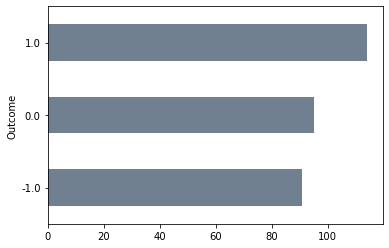

In [17]:
outcome_table = pd.DataFrame({'Outcome': outcomes})
outcome_table.groupby('Outcome')['Outcome'].count().plot.barh('Outcome', width=0.5, color='slategrey')
plt.show()